# Práctica de Optimizadores

### Importaciones

In [2]:
import keras
import matplotlib.pyplot as plt
import numpy as np
from keras.losses import categorical_crossentropy
from keras.datasets import mnist

2025-04-03 14:33:15.080118: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-03 14:33:15.080951: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-03 14:33:15.083981: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-03 14:33:15.090435: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743683595.102417   35649 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743683595.10

### Lectura de la información: dataset MNIST de Keras

In [3]:
# 1.- Cargar el dataset en cuatro arrays: x_entr, y_entr, x_val e y_val
#     Usar keras.datasets.mnist.load_data()
(x_entr, y_entr), (x_val, y_val) = mnist.load_data()    



### Preparación de los datos

In [4]:
# 2.- Conversión de la columna objetivo en categórica (usar keras.utils.to_categorical)
y_entr =  y_entr.reshape(-1, 1)  # reshape para convertir a 2D
y_entr = keras.utils.to_categorical(y_entr, num_classes=10)  # categórica

y_val  = y_val.reshape(-1, 1)  # reshape para convertir a 2D 
y_val  = keras.utils.to_categorical(y_val, num_classes=10)  # categórica


### Función de creación y compilación del modelo.

- El aplanamiento de las entradas se hace con una capa Flatten de Keras
- La capa de entrada es densa de 250 unidades, con activación ReLU
- La capa de salida tiene tantas unidades como clases de salida y activación *softmax*


In [5]:
# 3.- La función recibe el nombre del optimizador como argumento
def crea_modelo( optimizador):
  modelo = keras.models.Sequential()
  modelo.add(keras.layers.Flatten(input_shape=(28, 28)))
  modelo.add(keras.layers.Dense(250, activation='relu'))
  modelo.add(keras.layers.Dense(10, activation='softmax'))
  modelo.compile(optimizer=optimizador, loss=categorical_crossentropy, metrics=['accuracy'])
  return modelo





### Bucle de creación, compilación y entrenamiento de la red.

Se probarán los optimizadores: 'sgd', 'rmsprop', 'adagrad' y 'adam'

In [6]:
# 5.- Entrenamiento durante 40 iteraciones, con un tamaño de batch de 128 y los siguientes optimizadores:
#          'sgd', 'rmsprop', 'adagrad' y 'adam'
#     Las historias de cada entrenamiento se almacenarán en una lista para luego poder mostrar las gráficas de todos.
#     El entrenamiento usará los datasets de validación descargados desde Keras.
historias = []
optimizadores = ['sgd', 'rmsprop', 'adagrad', 'adam']
for optimizador in optimizadores:
  modelo = crea_modelo(optimizador)
  historia = modelo.fit(x_entr, y_entr, epochs=40, batch_size=128, validation_data=(x_val, y_val))
  historias.append(historia)



/home/sergio/venv_dl/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-04-03 14:40:31.295516: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4853 - loss: 167.5426 - val_accuracy: 0.7601 - val_loss: 0.9099
Epoch 2/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7685 - loss: 0.8795 - val_accuracy: 0.8719 - val_loss: 0.5929
Epoch 3/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8625 - loss: 0.6053 - val_accuracy: 0.8156 - val_loss: 0.7380
Epoch 4/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8190 - loss: 0.6727 - val_accuracy: 0.9009 - val_loss: 0.4902
Epoch 5/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9055 - loss: 0.4501 - val_accuracy: 0.9155 - val_loss: 0.4062
Epoch 6/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9139 - loss: 0.3954 - val_accuracy: 0.8866 - val_loss: 0.5250
Epoch 7/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8655 - loss: 0.4942 - val_accuracy: 0.8250 - val_loss: 0.5900
Epoch 8/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8689 - loss: 0.4962 - val_accuracy: 

### Gráficas de precisión en validación

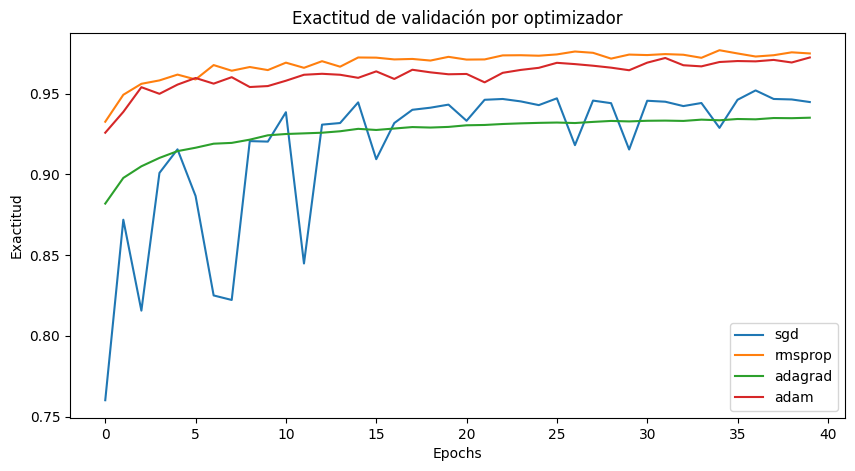

In [7]:
# 6.- Mostrar en una única gráfica, la evolución de la exactitud en validación de todos los entrenamientos.
plt.figure(figsize=(10, 5))
for i, historia in enumerate(historias):
  plt.plot(historia.history['val_accuracy'], label=optimizadores[i])
plt.title('Exactitud de validación por optimizador')
plt.xlabel('Epochs')
plt.ylabel('Exactitud')
plt.legend()
plt.show()